## Importing the libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Uploading the dataset and displaying it

In [ ]:
data = pd.read_csv("F:\\Shai for ai\\task5\\archive (1)\\Data Science Jobs Salaries.csv")

In [ ]:
data.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


In [ ]:
data.shape

(245, 11)

In [ ]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
# Printing information on the dataset
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns\n')
print('- -' * 30)
print('Value counts for each columns: \n')
for i in data.columns:
    print(f'===== {i} =====\n')
    print(data[i].value_counts().sort_values(ascending=False))
    print('- -' * 30)

The dataset has 245 rows and 11 columns

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Value counts for each columns: 

===== work_year =====

2021e    179
2020      66
Name: work_year, dtype: int64
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
===== experience_level =====

MI    103
SE     77
EN     54
EX     11
Name: experience_level, dtype: int64
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
===== employment_type =====

FT    231
PT      7
CT      4
FL      3
Name: employment_type, dtype: int64
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
===== job_title =====

Data Scientist                              59
Data Engineer                               38
Machine Learning Engineer                   20
Data Analyst                                20
Research Scientist                          10
Data Science 

## Checking for the null values

In [ ]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           245 non-null    object
 1   experience_level    245 non-null    object
 2   employment_type     245 non-null    object
 3   job_title           245 non-null    object
 4   salary              245 non-null    int64 
 5   salary_currency     245 non-null    object
 6   salary_in_usd       245 non-null    int64 
 7   employee_residence  245 non-null    object
 8   remote_ratio        245 non-null    int64 
 9   company_location    245 non-null    object
 10  company_size        245 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.2+ KB


In [ ]:
data.dtypes

work_year             object
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
data['work_year'].value_counts()

2021e    179
2020      66
Name: work_year, dtype: int64

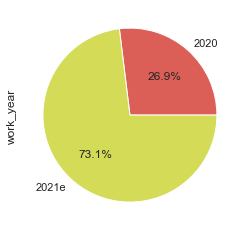

In [ ]:
data.groupby('work_year')['work_year'].count().plot.pie(autopct="%1.1f%%");

#As you can see there are two things that need to be taken care of.
#One is the starting space which is only observed for the year 2020.
#The next is the char 'e' is seen at the end of the year 2021.

In [ ]:
data['work_year'] = data['work_year'].str.replace(r'[\D\s]', '').astype(int)
data['work_year'].head()

<ipython-input-13-19cf6ab8cd81>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['work_year'] = data['work_year'].str.replace(r'[\D\s]', '').astype(int)


0    2021
1    2020
2    2021
3    2021
4    2021
Name: work_year, dtype: int32

In [ ]:
data['job_title'].nunique()

43

In [ ]:
data['job_title'].value_counts().head(10)

Data Scientist               59
Data Engineer                38
Machine Learning Engineer    20
Data Analyst                 20
Research Scientist           10
Data Science Consultant       7
Big Data Engineer             6
Data Science Manager          5
Lead Data Engineer            5
BI Data Analyst               5
Name: job_title, dtype: int64

In [ ]:
# Checking duplicated data
data.duplicated().sum()

1

In [ ]:
# Drop duplicated rows
data = data.drop_duplicates()

In [ ]:
data.groupby(['work_year']).agg(job_title = ('job_title','count')).reset_index()

,work_year,job_title
0,2020,66
1,2021,178


In [ ]:
data['salary_in_usd'].value_counts()

150000    5
200000    4
110000    4
100000    4
90000     4
         ..
21695     1
42000     1
63971     1
260000    1
94917     1
Name: salary_in_usd, Length: 188, dtype: int64

In [ ]:
data.employee_residence.value_counts()

US    92
IN    22
DE    18
FR    13
GB    13
CA     9
ES     7
JP     4
NL     4
GR     4
BR     4
PL     3
PT     3
TR     3
IT     3
PK     3
RU     3
MX     2
DK     2
RO     2
AT     2
NG     2
SG     2
HU     2
VN     2
LU     1
MD     1
SI     1
HK     1
CN     1
HR     1
BE     1
CL     1
KE     1
IR     1
NZ     1
CO     1
BG     1
RS     1
PR     1
JE     1
AE     1
UA     1
PH     1
MT     1
Name: employee_residence, dtype: int64

In [ ]:
data["experience_level"].value_counts()

MI    102
SE     77
EN     54
EX     11
Name: experience_level, dtype: int64

In [ ]:
data["experience_level"]=data["experience_level"].map({"MI":"Mid-level","SE":"Senior-level","EN":"Entry-level","EX":"Executive-level"})

In [ ]:
data["experience_level"].value_counts()

Mid-level          102
Senior-level        77
Entry-level         54
Executive-level     11
Name: experience_level, dtype: int64

In [ ]:
data["employment_type"].value_counts()

FT    230
PT      7
CT      4
FL      3
Name: employment_type, dtype: int64

In [ ]:
data["employment_type"]=data["employment_type"].map({"FT":"Full-Time","CT":"Contract","PT":"Part-Time","FL":"Freelance"})

In [ ]:
data["employment_type"].value_counts()

Full-Time    230
Part-Time      7
Contract       4
Freelance      3
Name: employment_type, dtype: int64

In [ ]:
data["company_size"].unique()

array(['L', 'M', 'S'], dtype=object)

In [ ]:
data["company_size"]=data["company_size"].map({"L":"Large-cap","S":"Small-cap","M":"Mid-Cap"})
data["company_size"]

0      Large-cap
1      Large-cap
2        Mid-Cap
3      Large-cap
4      Small-cap
         ...    
240    Large-cap
241    Large-cap
242    Small-cap
243    Large-cap
244    Large-cap
Name: company_size, Length: 244, dtype: object

In [ ]:
# Remote Ratio
data.remote_ratio.replace([0,50,100],['Onsite','Hybrid','Remote'], inplace=True)

#the most companies size is large and it's count is 132

In [ ]:
data['salary_currency'].nunique()

15

In [ ]:
data['salary_currency'].unique()

array(['EUR', 'USD', 'CAD', 'INR', 'PLN', 'GBP', 'HUF', 'SGD', 'MXN',
       'TRY', 'CLP', 'JPY', 'DKK', 'CNY', 'BRL'], dtype=object)

<AxesSubplot:xlabel='experience_level', ylabel='Count'>

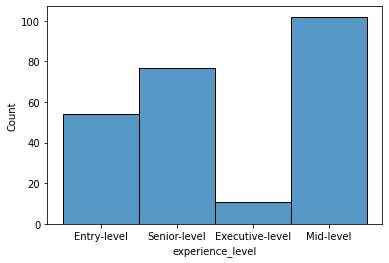

In [ ]:
sns.histplot(data['experience_level'])

#the mid level has the highest  count

<AxesSubplot:ylabel='salary_in_usd'>

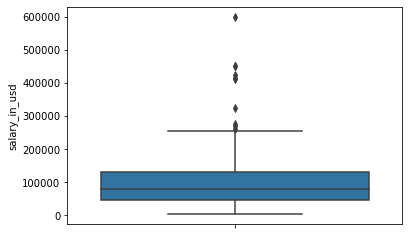

In [ ]:
sns.boxplot(y = 'salary_in_usd', data=data)

<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

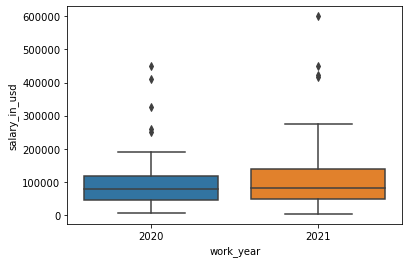

In [ ]:
sns.boxplot(x = 'work_year', y = 'salary_in_usd', data =data)

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

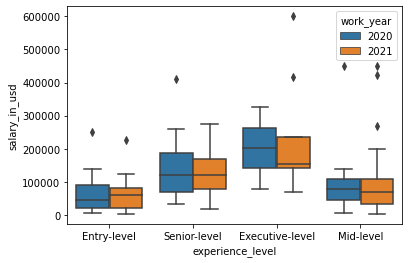

In [ ]:
sns.boxplot(x = 'experience_level', y = 'salary_in_usd',hue = "work_year" ,data =data)

<AxesSubplot:>

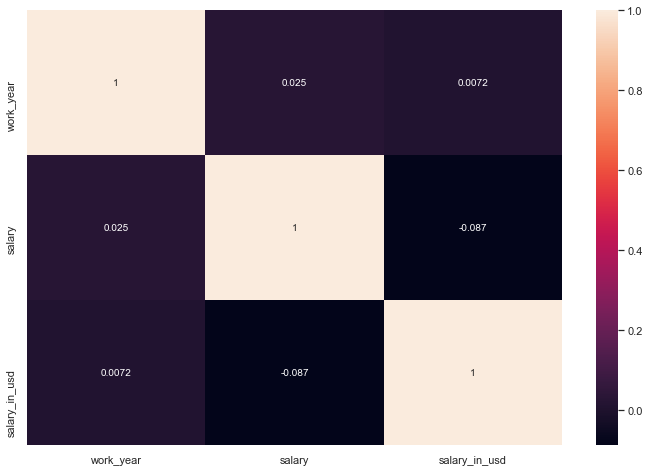

In [ ]:
corr = data.corr()
sns.set(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

In [ ]:
data = data.copy(deep=True)
data = data.rename(columns={'remote_ratio':'remote'})

data['remote'].replace(to_replace = 0, value = 'No', inplace=True)
data['remote'].replace(to_replace = 50, value = 'Partially', inplace=True)
data['remote'].replace(to_replace = 100, value = 'Fully', inplace=True)

data.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote,company_location,company_size
0,2021,Entry-level,Full-Time,Data Science Consultant,54000,EUR,64369,DE,Hybrid,DE,Large-cap
1,2020,Senior-level,Full-Time,Data Scientist,60000,EUR,68428,GR,Remote,US,Large-cap


In [ ]:
data["remote"].value_counts()

Remote    134
Hybrid     70
Onsite     40
Name: remote, dtype: int64

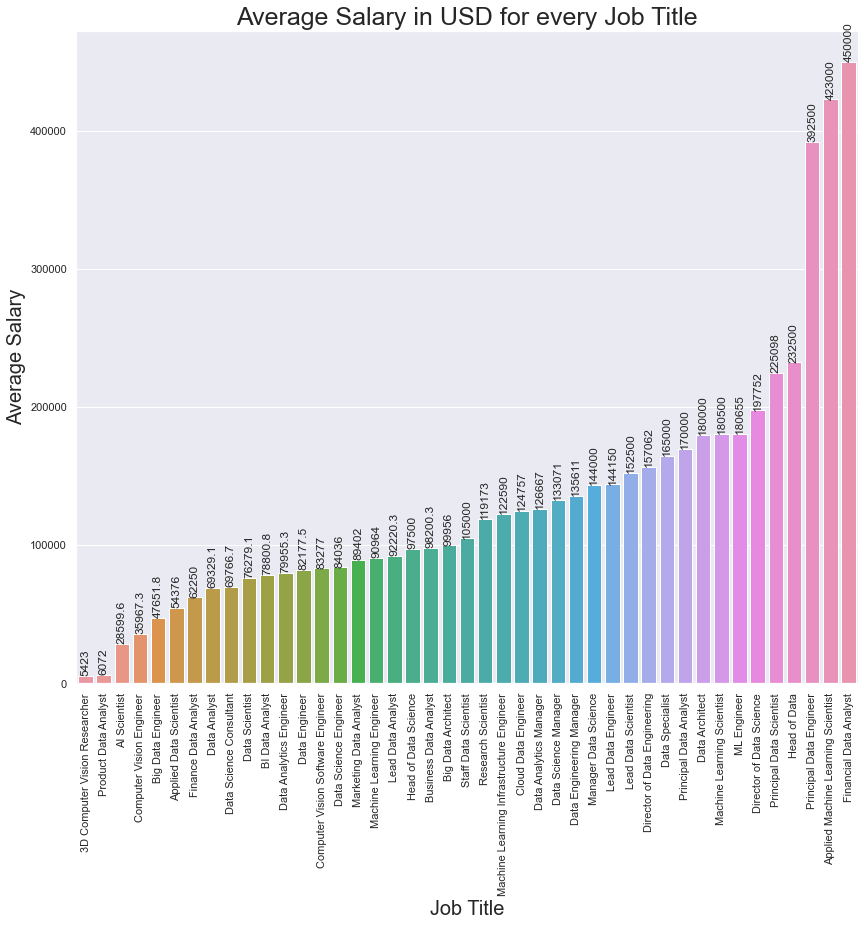

In [ ]:
# Let's take a look at the jobs and their salaries in usd
sns.set()
job_salary_usd = data[['job_title', 'salary_in_usd']]
job_salary_usd = job_salary_usd.groupby('job_title').mean()['salary_in_usd'].sort_values().reset_index()
fig = plt.figure(figsize=(14,12))
g = sns.barplot(x='job_title',
                y='salary_in_usd',
                data=job_salary_usd ,
                ci=None)
g.bar_label(g.containers[0], rotation=90)
plt.ylabel("Average Salary", size=20)
plt.xlabel('Job Title', size=20)
plt.xticks(rotation=90)
plt.title("Average Salary in USD for every Job Title", size=25);

#the highest job in usd if Financial and it's salary is 450000

In [ ]:
#العُملة
job_inr = data[data['salary_currency'] == 'INR']
job_inr = job_inr.groupby('job_title').mean()['salary'].sort_values().reset_index()
job_inr.head()

,job_title,salary
0,3D Computer Vision Researcher,4.000000e+05
1,Data Science Consultant,4.230000e+05
2,Data Analyst,4.500000e+05
3,Product Data Analyst,4.500000e+05
4,Big Data Engineer,1.102333e+06


In [ ]:
job_jpy = data[data['salary_currency'] == 'JPY']
job_jpy

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote,company_location,company_size
169,2020,Entry-level,Full-Time,Data Engineer,4450000,JPY,41689,JP,Remote,JP,Small-cap


In [ ]:
job_eur = data[data['salary_currency'] == 'EUR']
job_eur = job_eur.groupby('job_title').mean()['salary'].sort_values(ascending=False).reset_index()
job_eur.head()

,job_title,salary
0,Principal Data Scientist,138500.0
1,Director of Data Science,125000.0
2,Big Data Engineer,100000.0
3,Computer Vision Software Engineer,81000.0
4,Marketing Data Analyst,75000.0


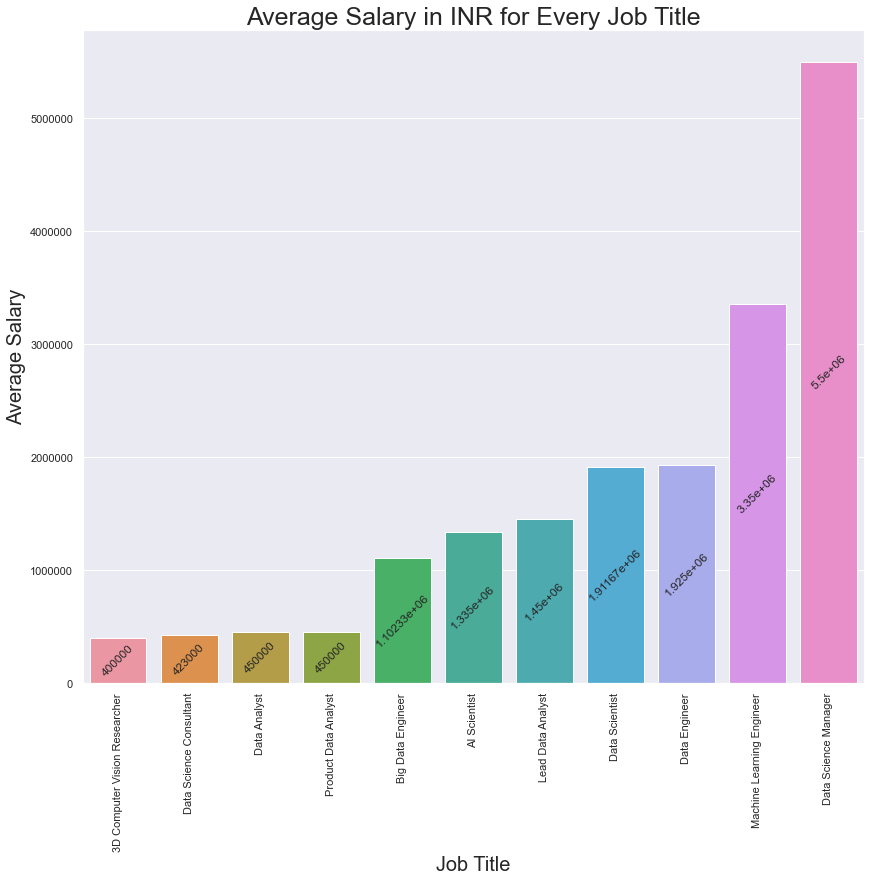

In [ ]:
fig = plt.figure(figsize=(14,12))
g = sns.barplot(x='job_title',
            y='salary',
            data=job_inr,
            ci=None)
g.bar_label(g.containers[0], rotation=45, label_type='center')
g.yaxis.get_major_formatter().set_scientific(False)
g.yaxis.get_major_formatter().set_useOffset(False)
plt.xlabel("Job Title", size=20)
plt.ylabel("Average Salary", size=20)
plt.title("Average Salary in INR for Every Job Title", size=25)
plt.xticks(rotation=90);

#the highest job in ini currency is Data Science Manager and it's salary is 5.5e + 06

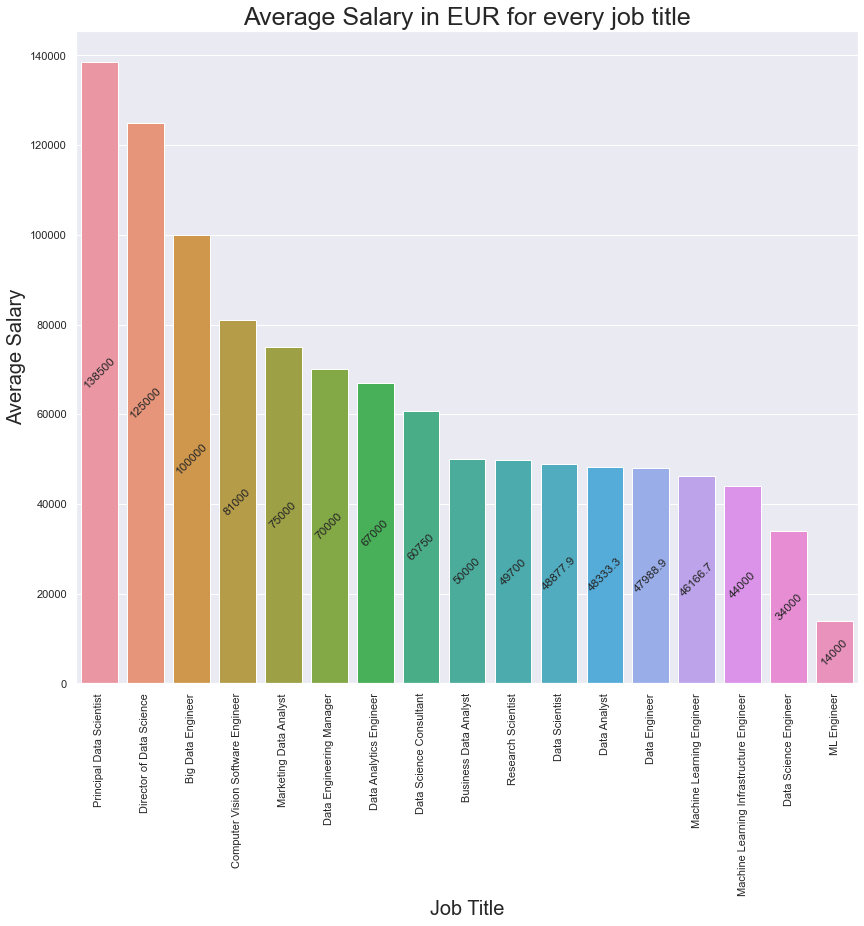

In [ ]:
fig = plt.figure(figsize=(14,12))
g = sns.barplot(x='job_title',
                y='salary',
                data=job_eur,
                ci=None)
g.bar_label(g.containers[0],rotation=45,label_type='center')
plt.xlabel("Job Title", size=20)
plt.ylabel("Average Salary", size=20)
plt.xticks(rotation=90)
plt.title("Average Salary in EUR for every job title", size=25);

#the highest job in EUR currency is Principal Data Scientist and it's salary is 138500

In [ ]:
com_loc = data.groupby('company_location').size().sort_values(ascending=False)
com_loc.head()

company_location
US    108
DE     18
IN     17
GB     16
FR     11
dtype: int64

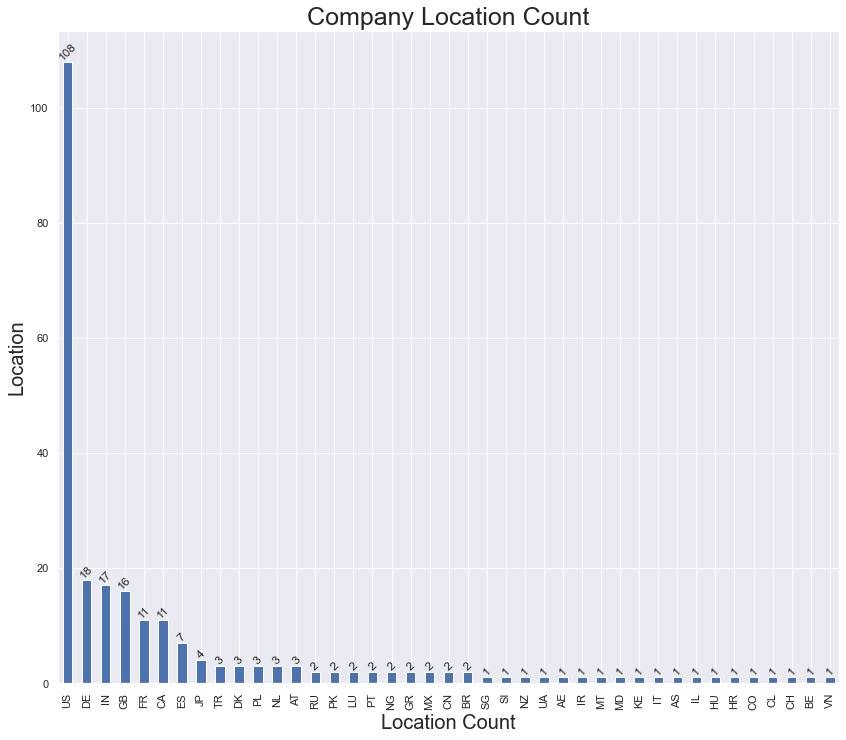

In [ ]:
#plotting the data
fig = plt.figure(figsize=(14,12))
g = com_loc.plot(kind='bar')
g.bar_label(g.containers[0],rotation=45)
plt.xlabel("Location Count", size=20)
plt.ylabel('Location', size=20)
plt.title("Company Location Count", size=25)
plt.show()

#the US has the most Companies Locations

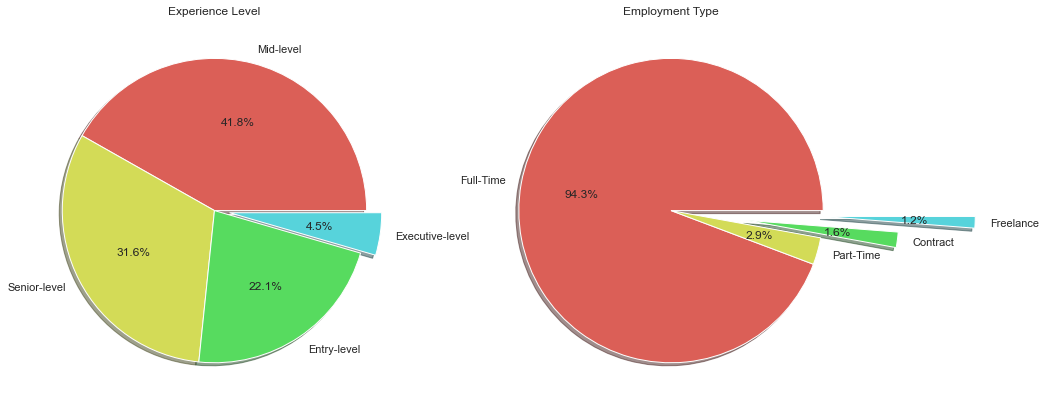

In [ ]:
plt.figure(figsize=(15,7))
color=sns.set_palette("hls")
plt.subplot(1,2,1)
k=data["experience_level"].value_counts()
plt.pie(k,labels=k.index,autopct="%0.01f%%",shadow=True,explode=[0,0,0,0.1],)
plt.title("Experience Level")

plt.subplot(1,2,2)
k1=data["employment_type"].value_counts()
plt.pie(k1,labels=k1.index,autopct="%0.01f%%",shadow=True,explode=[0,0,0.5,1])
plt.title("Employment Type")
plt.show()

#in the first pie the most Experience level is the Mid Level
#in the second pie the most Employment Type is Full-Time

# Most Popular Job Profile In Data-Domain:

In [ ]:
most_job=data["job_title"].value_counts()[:15]
most_job=most_job.to_frame()
most_job

,job_title
Data Scientist,58
Data Engineer,38
Machine Learning Engineer,20
Data Analyst,20
Research Scientist,10
Data Science Consultant,7
Big Data Engineer,6
Data Science Manager,5
Lead Data Engineer,5
BI Data Analyst,5


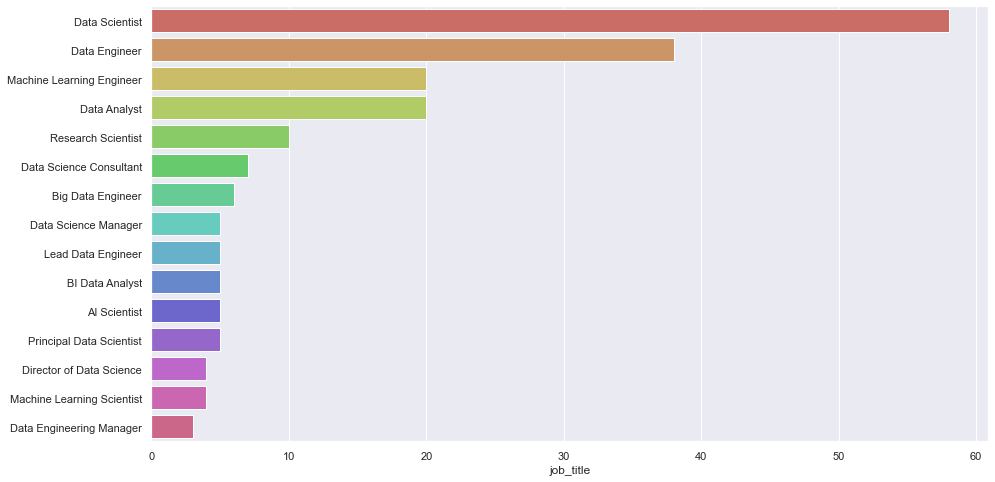

In [ ]:
#job_title
plt.figure(figsize=(15,8))
sns.barplot(y=most_job.index,x=most_job["job_title"],data=most_job,palette="hls")
plt.show()

#Data Scientist is Most Popular Job Profile Amongest Data-Domain.
#Data Scientist, Data Enigneer & Data Analyst Are Top-3 job Profiles in Data Domain.

# Most No. Of Data Employee Residence & Countries with Most No. Of Companies.

In [ ]:
employee_residence=data["employee_residence"].value_counts()[:15].to_frame()
employee_residence

,employee_residence
US,92
IN,22
DE,18
FR,13
GB,13
CA,9
ES,7
JP,4
NL,4
GR,4


In [ ]:
company_location=data["company_location"].value_counts()[:15].to_frame()
company_location

,company_location
US,108
DE,18
IN,17
GB,16
FR,11
CA,11
ES,7
JP,4
AT,3
NL,3


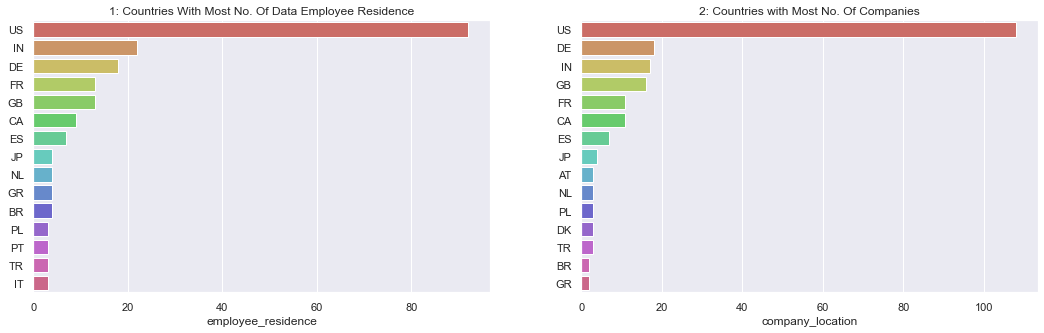

In [ ]:
#employee_residence
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.barplot(y=employee_residence.index,x=employee_residence["employee_residence"],data=employee_residence,palette="hls")
plt.title("1: Countries With Most No. Of Data Employee Residence")

plt.subplot(1,2,2)
sns.barplot(y=company_location.index,x=company_location["company_location"],data=company_location,palette="hls")
plt.title("2: Countries with Most No. Of Companies");

#* **In Chart 1:** The **United States (US)** Residence Employee more work in the **Data Related Field** as Compared to Other Countries Residence.
#* **In Chart 2:** The **United States (US)** Has Majority of Most NO. Of Companies Who Hire's Data Scientist/Professionals .

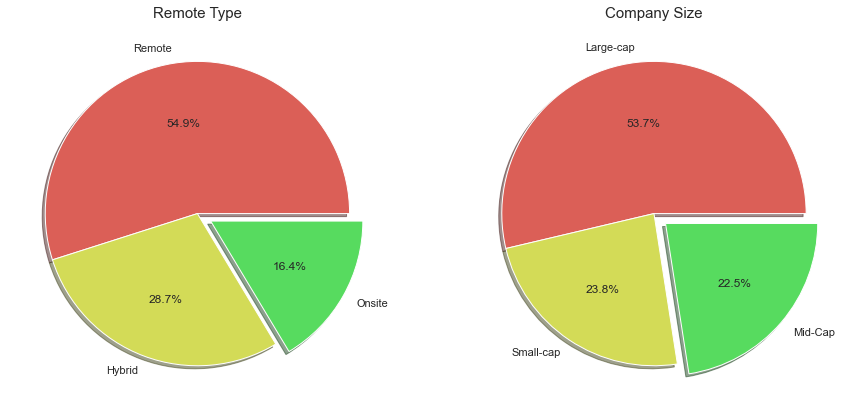

In [ ]:
#remote_ratio & company_size
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
ss=data["remote"].value_counts()
plt.pie(ss,labels=ss.index,autopct="%0.01f%%",shadow=True,explode=[0,0,0.1],colors=color)
plt.title("Remote Type",fontsize=15)

plt.subplot(1,2,2)
vv=data["company_size"].value_counts()
plt.pie(vv,labels=vv.index,autopct="%0.01f%%",shadow=True,explode=[0,0,0.1],colors=color)
plt.title("Company Size",fontsize=15)
plt.show()

#Majority of the employees work Fully remotely (60% remote work).
#Mid-Cap Companies Has Most No. Data Professional Employess As Compared To Large-cap ANd Small-cap Companiees.

# What The Average Salaries ($) Based On Their Experience Level ?

In [ ]:
salaries=data.groupby(["experience_level"])["salary_in_usd"].mean().to_frame()
salaries

,salary_in_usd
experience_level,
Entry-level,59753.462963
Executive-level,226288.000000
Mid-level,85681.647059
Senior-level,128841.298701


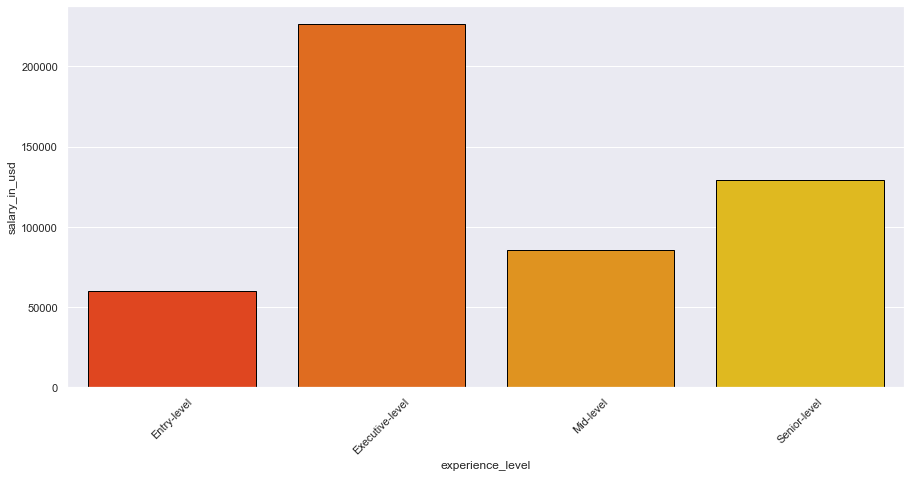

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=salaries.index,y=salaries["salary_in_usd"],data=salaries,palette="autumn",edgecolor="black")
plt.xticks(rotation=45)
plt.show()

#Salary of Exceutive-Level Employee has Much Higher As Compared to Senior-Level & Mid-Level Employee.

# What The Average Salaries($) Based On Their Employment Types ?

In [ ]:
e_type=data.groupby(["employment_type"])["salary_in_usd"].mean().to_frame()
e_type

,salary_in_usd
employment_type,
Contract,222750.000000
Freelance,30666.666667
Full-Time,100986.634783
Part-Time,23748.142857


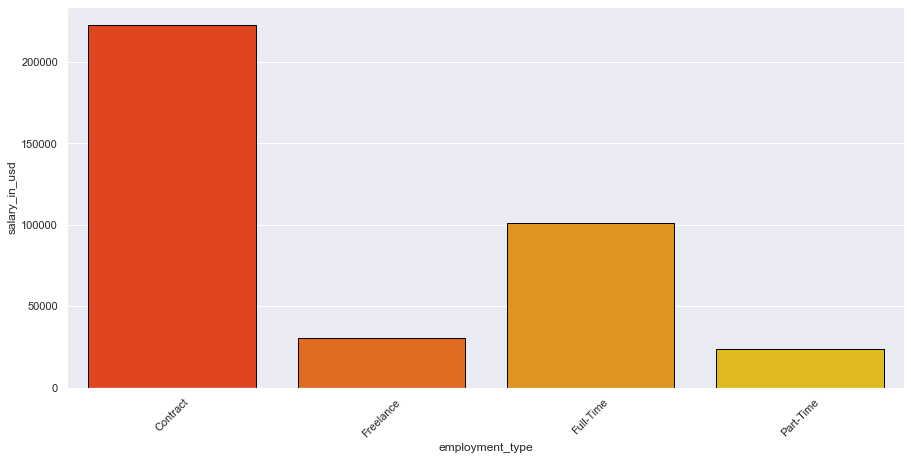

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=e_type.index,y=e_type["salary_in_usd"],data=e_type,palette="autumn",edgecolor="black")
plt.xticks(rotation=45)
plt.show()

#Those Employees Who Work's On Contract Based Agreement Got Higher Salaries As Compared To Full-Time Worker's Or Freelance Worker's .

# Which Are The Top 10 Highest Paying Job Profile ?

In [ ]:
title=data.groupby(["job_title"])["salary_in_usd"].mean().sort_values(ascending=False)[:10]
title=title.to_frame()
title

,salary_in_usd
job_title,
Financial Data Analyst,450000.000000
Applied Machine Learning Scientist,423000.000000
Principal Data Engineer,392500.000000
Head of Data,232500.000000
Principal Data Scientist,225097.800000
Director of Data Science,197751.500000
ML Engineer,180655.333333
Machine Learning Scientist,180500.000000
Data Architect,180000.000000


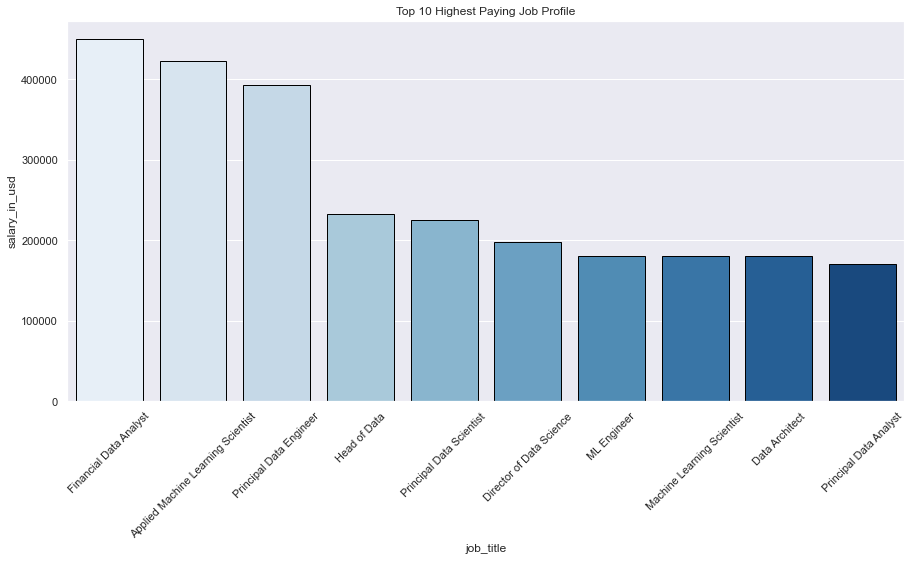

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=title.index,y=title["salary_in_usd"],data=title,palette="Blues",edgecolor="black")
plt.xticks(rotation=45)
plt.title("Top 10 Highest Paying Job Profile")
plt.show()

#Above Chart Tells About The Top 10 Highest Paying Jobs In This Field.
#Data Analytics Lead Job Profile Got Higher Salaries Packages From The Companies.

# Which Company Type Are More Flexibile Towards Remote Jobs?

In [ ]:
data1=data.groupby(["company_size"])["remote"].value_counts().to_frame().rename(columns={"remote":"count"})
data1=data1.reset_index()
data1

,company_size,remote,count
0,Large-cap,Remote,69
1,Large-cap,Hybrid,45
2,Large-cap,Onsite,17
3,Mid-Cap,Remote,30
4,Mid-Cap,Onsite,13
5,Mid-Cap,Hybrid,12
6,Small-cap,Remote,35
7,Small-cap,Hybrid,13
8,Small-cap,Onsite,10


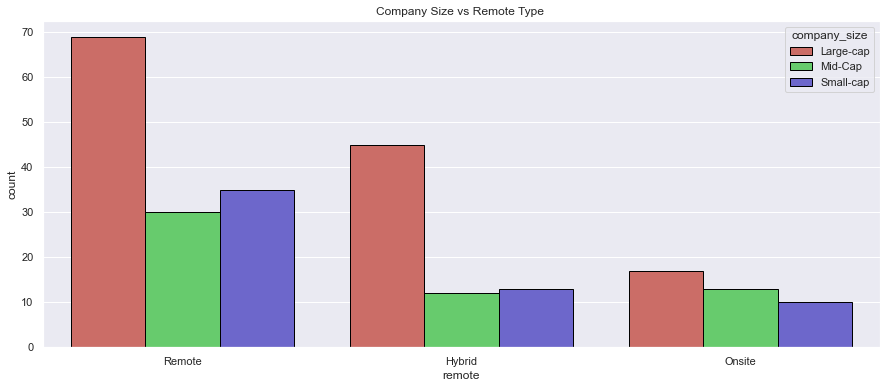

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x="remote",y="count",data=data1,hue="company_size",palette="hls",edgecolor="black")
plt.title("Company Size vs Remote Type ");

#Fully-Remote Jobs are Higher In Mid-cap Company as Compared To Large-cap & Small-cap Companies.
#Partially Remote Jobs are Higher In Large-cap Companies as Compared To Others.
#No-Remote Jobs are Higher In Mid-cap Companies as Comapred to Large-cap & Small-cap Companies.

# Which Companies Location Which Give Higher Average Salaries to Their Data Professionals?

In [ ]:
comp_sal=data.groupby(["company_location"])["salary_in_usd"].agg(["mean"]).sort_values(by="mean",ascending=False)[:10]
comp_sal

,mean
company_location,
RU,157500.000000
US,145059.314815
JP,135922.250000
NZ,125000.000000
IL,119353.000000
AE,115000.000000
CA,108633.545455
SG,89514.000000
BE,89402.000000


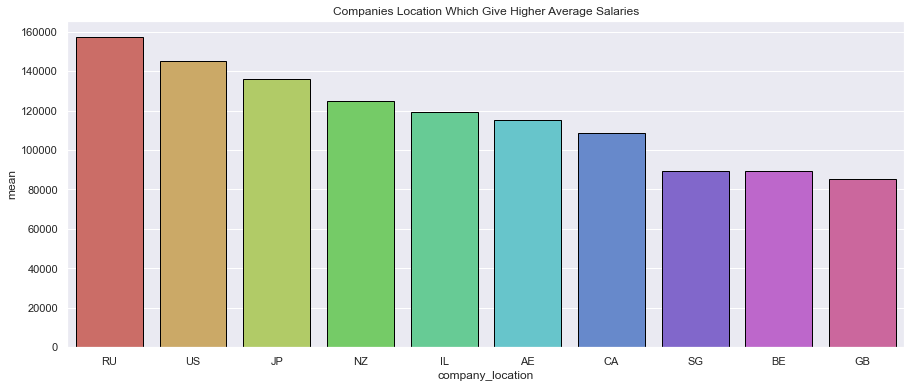

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=comp_sal.index,y="mean",data=comp_sal,palette="hls",edgecolor="black")
plt.title("Companies Location Which Give Higher Average Salaries");

#Companies Located In Russia (RU) Gives Higher Average Salaries To Their Data Professionals Employees Than United States (US) And Than NewZealand (NZ).

# How Remote Type Jobs & Company Size Affect The Employee's Compensations?

In [ ]:
remote=data.groupby(["remote"])["salary_in_usd"].mean().to_frame()
remote

,salary_in_usd
remote,
Hybrid,79331.942857
Onsite,84962.450000
Remote,115107.679104


In [ ]:
size=data.groupby(["company_size"])["salary_in_usd"].mean().to_frame()
size

,salary_in_usd
company_size,
Large-cap,114548.625954
Mid-Cap,85082.818182
Small-cap,80874.793103


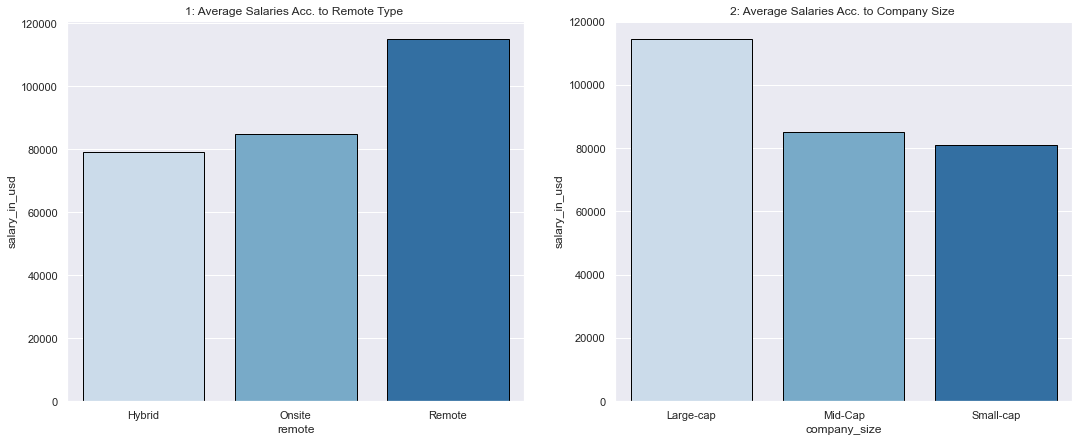

In [ ]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.barplot(x=remote.index,y=remote["salary_in_usd"],data=remote,palette="Blues",edgecolor="black")
plt.title("1: Average Salaries Acc. to Remote Type ")

plt.subplot(1,2,2)
sns.barplot(x=size.index,y=size["salary_in_usd"],data=size,palette="Blues",edgecolor="black")
plt.title("2: Average Salaries Acc. to Company Size ")

plt.show()

#Chart 1: The Average Salaries of Fully Remote Employees Is Much Higher Than The Partially Remote And Non Remote Employees.
#Chart 2: The Large-Cap & Mid-Cap Companies Almost Give Equivalent Salaries to Their Employees.

# Over Years Salaries Trend With Employment Type :-
# (Full-Time, Part-Time, Freelance, Contract)

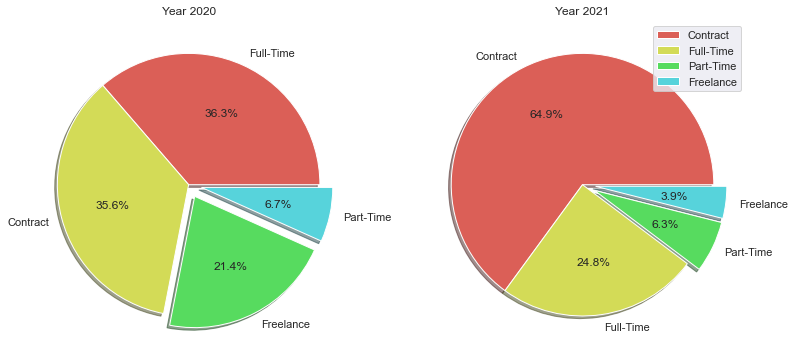

In [ ]:
year1=data[data["work_year"]==2020]
yr1=year1.groupby("employment_type")["salary_in_usd"].mean().sort_values(ascending=False)

year2=data[data["work_year"]==2021]
yr2=year2.groupby("employment_type")["salary_in_usd"].mean().sort_values(ascending=False)

year3=data[data["work_year"]==2022]
yr3=year3.groupby("employment_type")["salary_in_usd"].mean().sort_values(ascending=False)

plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.pie(yr1,labels=yr1.index,autopct="%0.01f%%",explode=[0,0,0.1,0.1],shadow=True)
plt.title("Year 2020")


plt.subplot(1, 3, 2)
plt.pie(yr2,labels=yr2.index,autopct="%0.01f%%",explode=[0,0,0.1,0.1],shadow=True)
plt.title("Year 2021")


plt.legend()

plt.show()


#In Year-2020 The Salaries are Approx. Similar For Contract Based & Full-Time Employment. (36.1% & 35.5% Respectively)
#But, In Year-2021 Contract-Based Got Higher Salaries (65.4%) as Compared Other Types.
#In Year-2022 Full-Time And Freelance Got Higher Salaries As Compared to Contract based and Part-Time Jobs.

# Over Years Salaries Distributions Of Data Professionals :

C:\Users\Anwar Altorkmani\Anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anwar Altorkmani\Anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


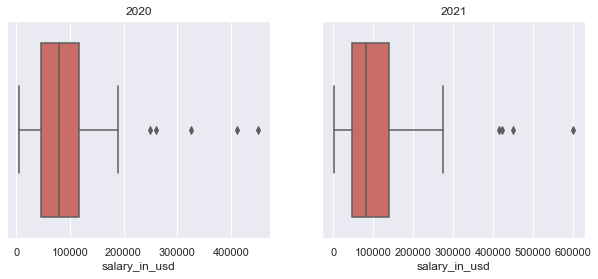

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.boxplot(year1["salary_in_usd"],)
plt.title("2020")

plt.subplot(1,3,2)
sns.boxplot(year2["salary_in_usd"],)
plt.title("2021")

plt.show()

# Over Years Ratio of Remote Trends In Data Jobs:

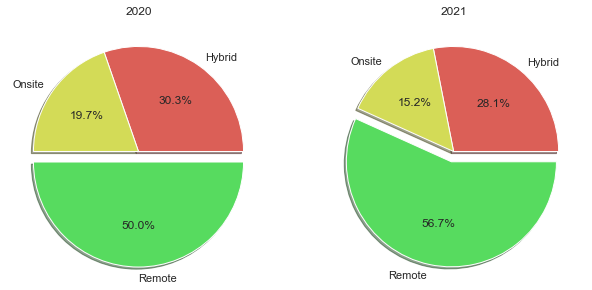

In [ ]:
remote1=year1.groupby(["remote"])["remote"].count()

remote2=year2.groupby(["remote"])["remote"].count()

remote3=year3.groupby(["remote"])["remote"].count()

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.pie(remote1,labels=remote1.index,autopct="%0.01f%%",explode=[0,0,0.1],shadow=True)
plt.title("2020")

plt.subplot(1,3,2)
plt.pie(remote2,labels=remote2.index,autopct="%0.01f%%",explode=[0,0,0.1],shadow=True)
plt.title("2021")
plt.show()

#In Year-2020 Their is Fully remote Jobs With (50.0%) & No Remote Jobs (20.8%) and Partially Remote Jobs (29.2%).
#In Year-2021 Fully remote and Partially Remote Jobs Are Increased Whereas Non remote Jobs Are Decreased by the Time.
#In Year-2022 Fully remote Jobs Increased Massively with (71.7%) and Partially remote Jobs Are Decreased to (3.8%)

# Top-5 Jobs Over The Years In Data Domian:-

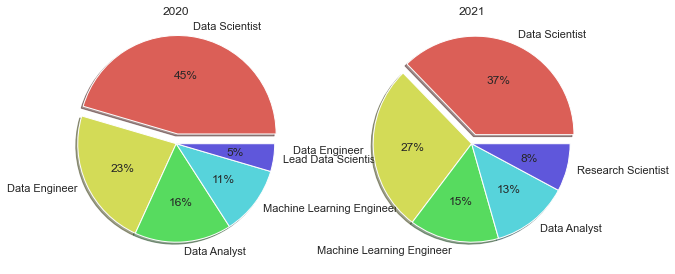

In [ ]:
top1=year1["job_title"].value_counts()[:5]
top2=year2["job_title"].value_counts()[:5]
top3=year3["job_title"].value_counts()[:5]

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.pie(top1,labels=top1.index,autopct="%0.0f%%",explode=[0.1,0,0,0,0],shadow=True)
plt.title("2020")

plt.subplot(1,3,2)
plt.pie(top2,labels=top2.index,autopct="%0.0f%%",explode=[0.1,0,0,0,0],shadow=True)
plt.title("2021")


plt.show()

#Above Pie Chart Indicate's Top-5 Jobs Over The Years in Data World.
#In Year- (2020 & 2021) :- DATA SCIENTIST Is The Most Popuplar Job In Data Domain,
#But In Year- (2022) :- DATA ENGINEER Is The Most Popular Job In Data Domain.

# How Many Employees Who Are Employeed in Their Own Native Country ?

In [ ]:
location=data[data["employee_residence"]==data["company_location"]]
location1=data[data["employee_residence"]!=data["company_location"]]
k=location[["employee_residence","company_location"]].value_counts().reset_index()[:10]
k

,employee_residence,company_location,0
0,US,US,90
1,IN,IN,17
2,DE,DE,16
3,GB,GB,12
4,FR,FR,10
5,CA,CA,9
6,ES,ES,6
7,JP,JP,4
8,TR,TR,3
9,NL,NL,3


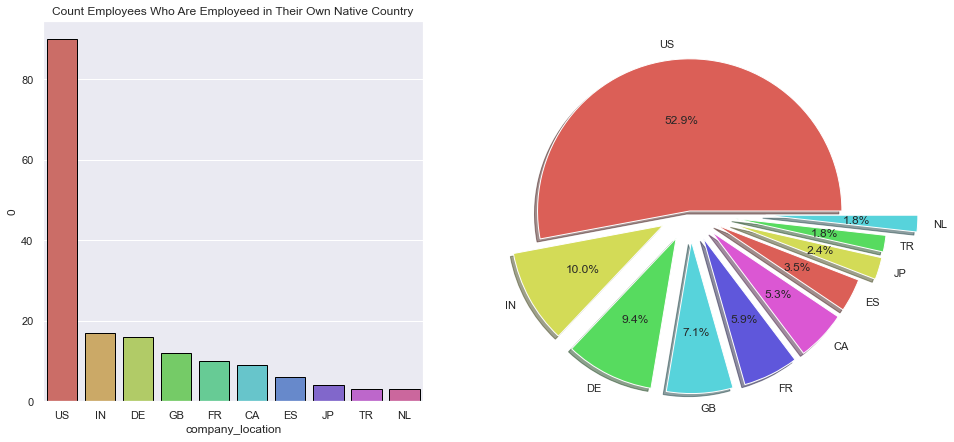

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.barplot(x=k["company_location"],y=k[0],data=k1,palette="hls",edgecolor="black")
plt.title("Count Employees Who Are Employeed in Their Own Native Country")

plt.subplot(1,2,2)
plt.pie(k[0],labels=k["employee_residence"],autopct="%0.01f%%",explode=[0,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.5],shadow=True)
plt.show()

#Above Chart Indicate's The Count Employees Who Are Employeed in Their Own Native Country.
#United States(US) residence has massive majority in being Employed in Their Own Country.

# How Many Employees Are Employeed In Some Other Countries ?

In [ ]:
location1=data[data["employee_residence"]!=data["company_location"]]
k1=location1[["employee_residence","company_location"]].value_counts().reset_index()[:10]
k1

,employee_residence,company_location,0
0,IN,US,3
1,BR,US,2
2,PT,US,1
3,NL,DE,1
4,PH,US,1
5,PK,US,1
6,PL,GB,1
7,PR,US,1
8,BG,US,1
9,JE,CN,1


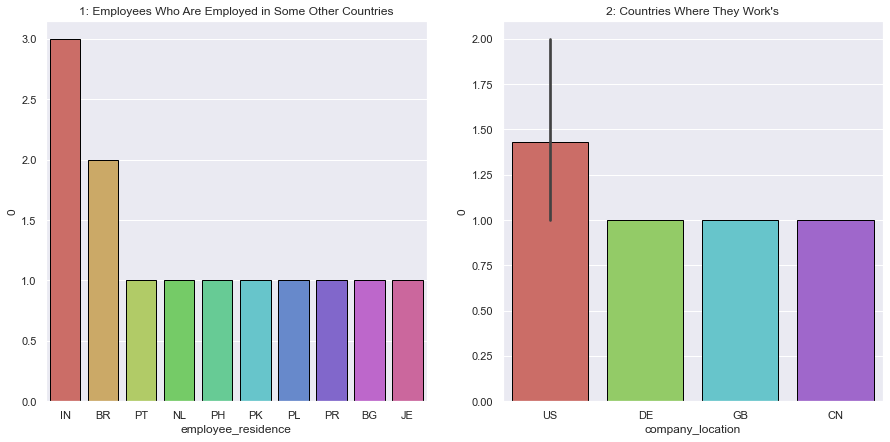

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.barplot(x=k1["employee_residence"],y=k1[0],data=k1,palette="hls",edgecolor="black")
plt.title("1: Employees Who Are Employed in Some Other Countries")

plt.subplot(1,2,2)
sns.barplot(x=k1["company_location"],y=k1[0],data=k1,palette="hls",edgecolor="black")
plt.title("2: Countries Where They Work's")
plt.show()

#In Charts-1 Indicate's Employees Who Are Employed in Some Other Countries,
#India Has Highest No. Peoples Who Employed In Some Diffirent Countries.
#In Charts-2 Indicate's Countries Where They Work's.

# Which are the Highest Paying Jobs Profile In India

In [ ]:
india=data[data["company_location"]=="IN"]
job1=india.groupby("job_title")["salary"].agg(["mean"]).sort_values(by="mean",ascending=False)
job1

,mean
job_title,
Data Science Manager,7000000.0
Machine Learning Engineer,3349998.5
Data Scientist,2210000.0
Data Engineer,1925000.0
Lead Data Analyst,1450000.0
Big Data Engineer,1436000.0
Data Analyst,450000.0
Product Data Analyst,450000.0
Data Science Consultant,423000.0


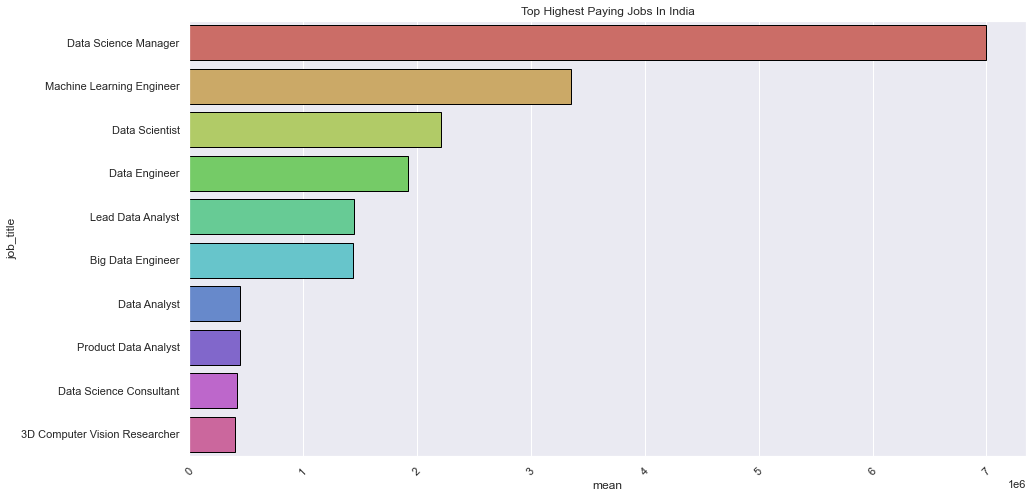

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=job1["mean"],y=job1.index,data=job1,palette="hls",edgecolor="black")
plt.title("Top Highest Paying Jobs In India")
plt.xticks(rotation=45)
plt.show()

#DATA SCIENCE MANAGER & HEAD OF MACHINE LEARNING job Profile's is Most High Paying jobs In India.

<AxesSubplot:xlabel='salary_in_usd', ylabel='company_location'>

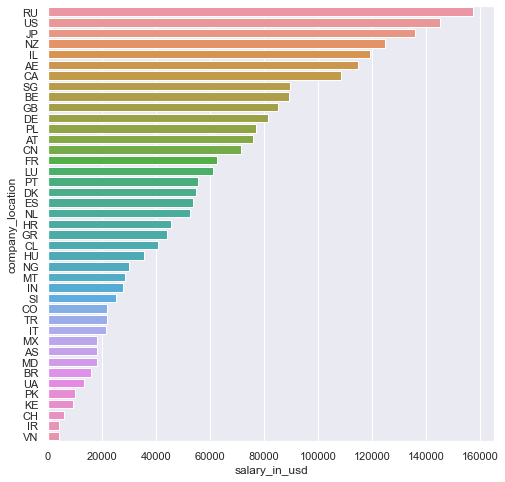

In [ ]:
mean_by_location = data.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending = False)
plt.figure(figsize = (8, 8))
sns.barplot(y = mean_by_location.index, x = mean_by_location)

<AxesSubplot:xlabel='salary_in_usd', ylabel='job_title'>

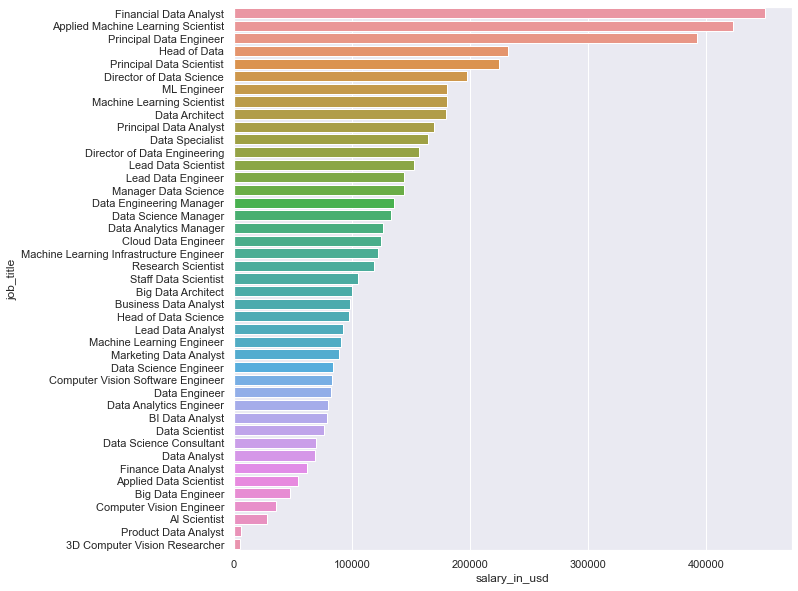

In [ ]:
salary_by_title = data.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x = salary_by_title, y = salary_by_title.index)

<AxesSubplot:xlabel='salary_in_usd', ylabel='job_title'>

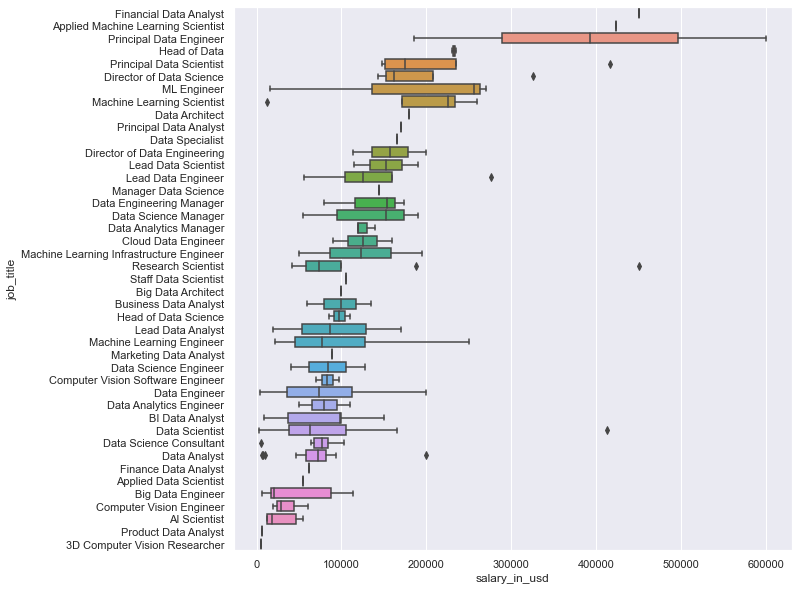

In [ ]:
plt.figure(figsize = (10, 10))
sns.boxplot(x = data["salary_in_usd"], y = data["job_title"], order=salary_by_title.index)

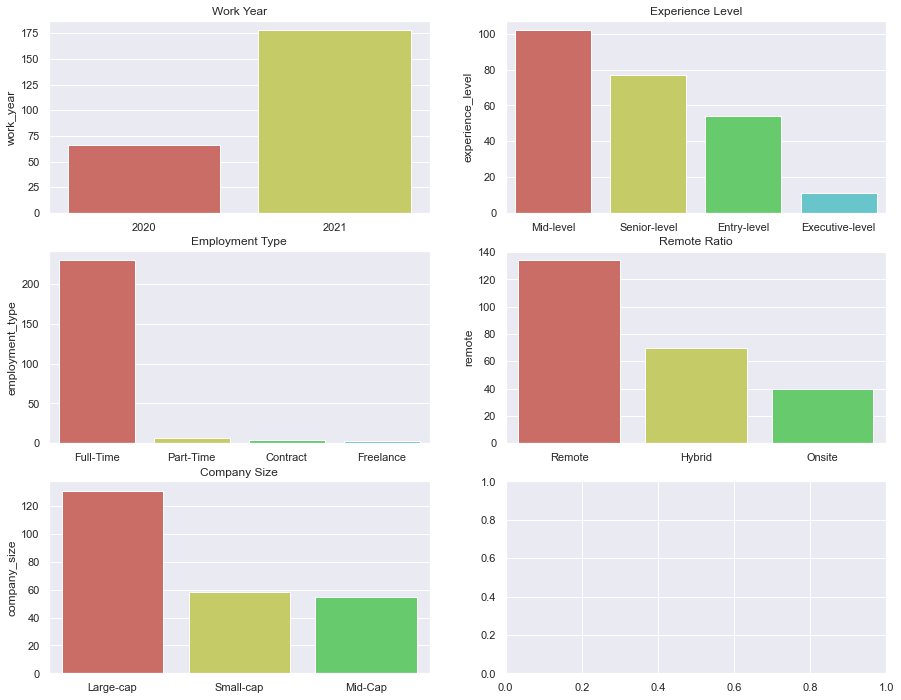

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = (15, 12))

sns.barplot(x = data["work_year"].value_counts().sort_values(ascending = False).index, y = data["work_year"].value_counts().sort_values(ascending = False), ax = axes[0][0])
axes[0][0].set_title("Work Year")

sns.barplot(x = data["experience_level"].value_counts().sort_values(ascending = False).index, y = data["experience_level"].value_counts().sort_values(ascending = False), ax = axes[0][1])
axes[0][1].set_title("Experience Level")

sns.barplot(x = data["employment_type"].value_counts().sort_values(ascending = False).index, y = data["employment_type"].value_counts().sort_values(ascending = False), ax = axes[1][0])
axes[1][0].set_title("Employment Type")

sns.barplot(x = data["remote"].value_counts().sort_values(ascending = False).index, y = data["remote"].value_counts().sort_values(ascending = False), ax = axes[1][1])
axes[1][1].set_title("Remote Ratio")

sns.barplot(x = data["company_size"].value_counts().sort_values(ascending = False).index, y = data["company_size"].value_counts().sort_values(ascending = False), ax = axes[2][0])
axes[2][0].set_title("Company Size");

Text(0.5, 1.0, 'Variation of remote ratio from 2020-2022')

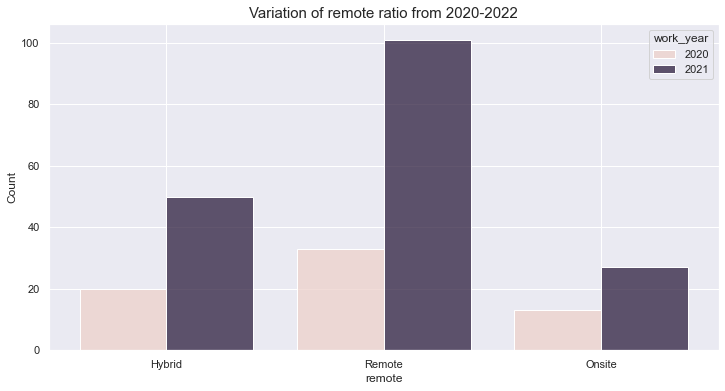

In [ ]:
#Analysis 3: How does the remote-ratio vary from year 2020 -2021?
# Set the figure size
plt.figure(figsize = (12,6))

# plot a hist chart
sns.histplot(data = data, x = 'remote', hue = 'work_year', multiple = 'dodge', shrink = 0.8)
plt.title('Variation of remote ratio from 2020-2022', fontsize = 15)

In [ ]:
#From 2020 to 2021 there will be an increase in the rate of remote work by Data Science workers.
#The chart shows the existence of a new culture that is most favored by Data Science workers, namely remote / work from home.

In [ ]:
#Analysis 5: How is the distribution of Data Science worker locations?

Text(0.5, 1.0, 'Company Locations with Most Workers')

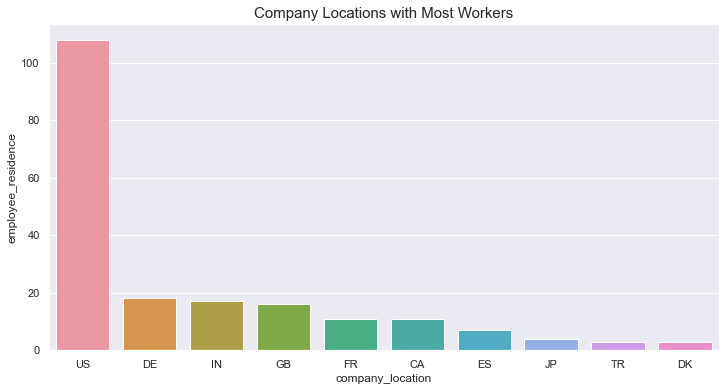

In [ ]:
# Set the figure size
plt.figure(figsize = (12,6))

# plot a bar chart
sns.barplot(x = data.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10).index,
            y = data.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10))
plt.title("Company Locations with Most Workers", fontsize = 15)